In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from PyCUB import pyCUB 
import matplotlib.pyplot as plt

In [8]:
cub = pyCUB.PyCUB(session = 'jerem')
cub.load(filename='first50', From='yun')

working on session: jerem
you already have a session here (just a warning)
Reviewing all the 495 files
at homology YAL019W we have 285 species possessing it
at homology YAL033W we have 381 species possessing it
at homology YAL041W we have 239 species possessing it
at homology YAL046C we have 309 species possessing it
at homology YAL064C-A we have 39 species possessing it
at homology YAL068C we have 9 species possessing it
at homology YBL005W we have 22 species possessing it
at homology YBL010C we have 21 species possessing it
at homology YBL018C we have 23 species possessing it
at homology YBL019W we have 193 species possessing it
at homology YBL034C we have 217 species possessing it
at homology YBL040C we have 305 species possessing it
at homology YBL063W we have 391 species possessing it
at homology YBL089W we have 185 species possessing it
at homology YBL090W we have 51 species possessing it
at homology YBL095W we have 199 species possessing it
at homology YBL099W we have 375 specie

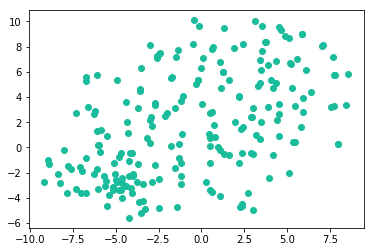

40

In [3]:
cub.all_homoset['YBR160W'].plot()

In [ ]:
import numpy as np
plt.figure(figsize=(40,80))
#plt.imshow(np.matmul(cub.matrix.T ,cub.matrix))
plt.imshow(cub.all_homoset.hashomo_matrix)
plt.show()



## can be seen as how similar species are to each others.

### and cluster them accordingly

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 1301.0
Run 1, iteration: 2/100, moves: 1, cost: 1301.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2407.0
Best run was number 1
the quality of the clustering is: 
0.407662983144
17.8601316029
plotting the ordering... might take time


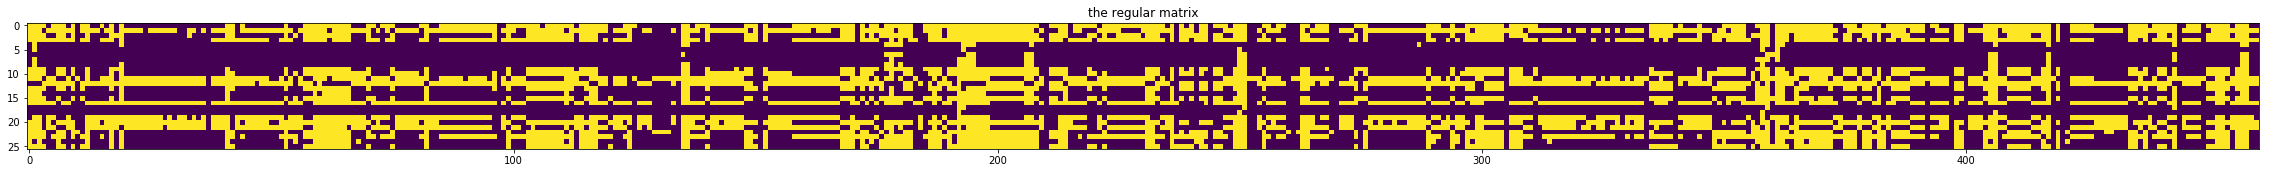

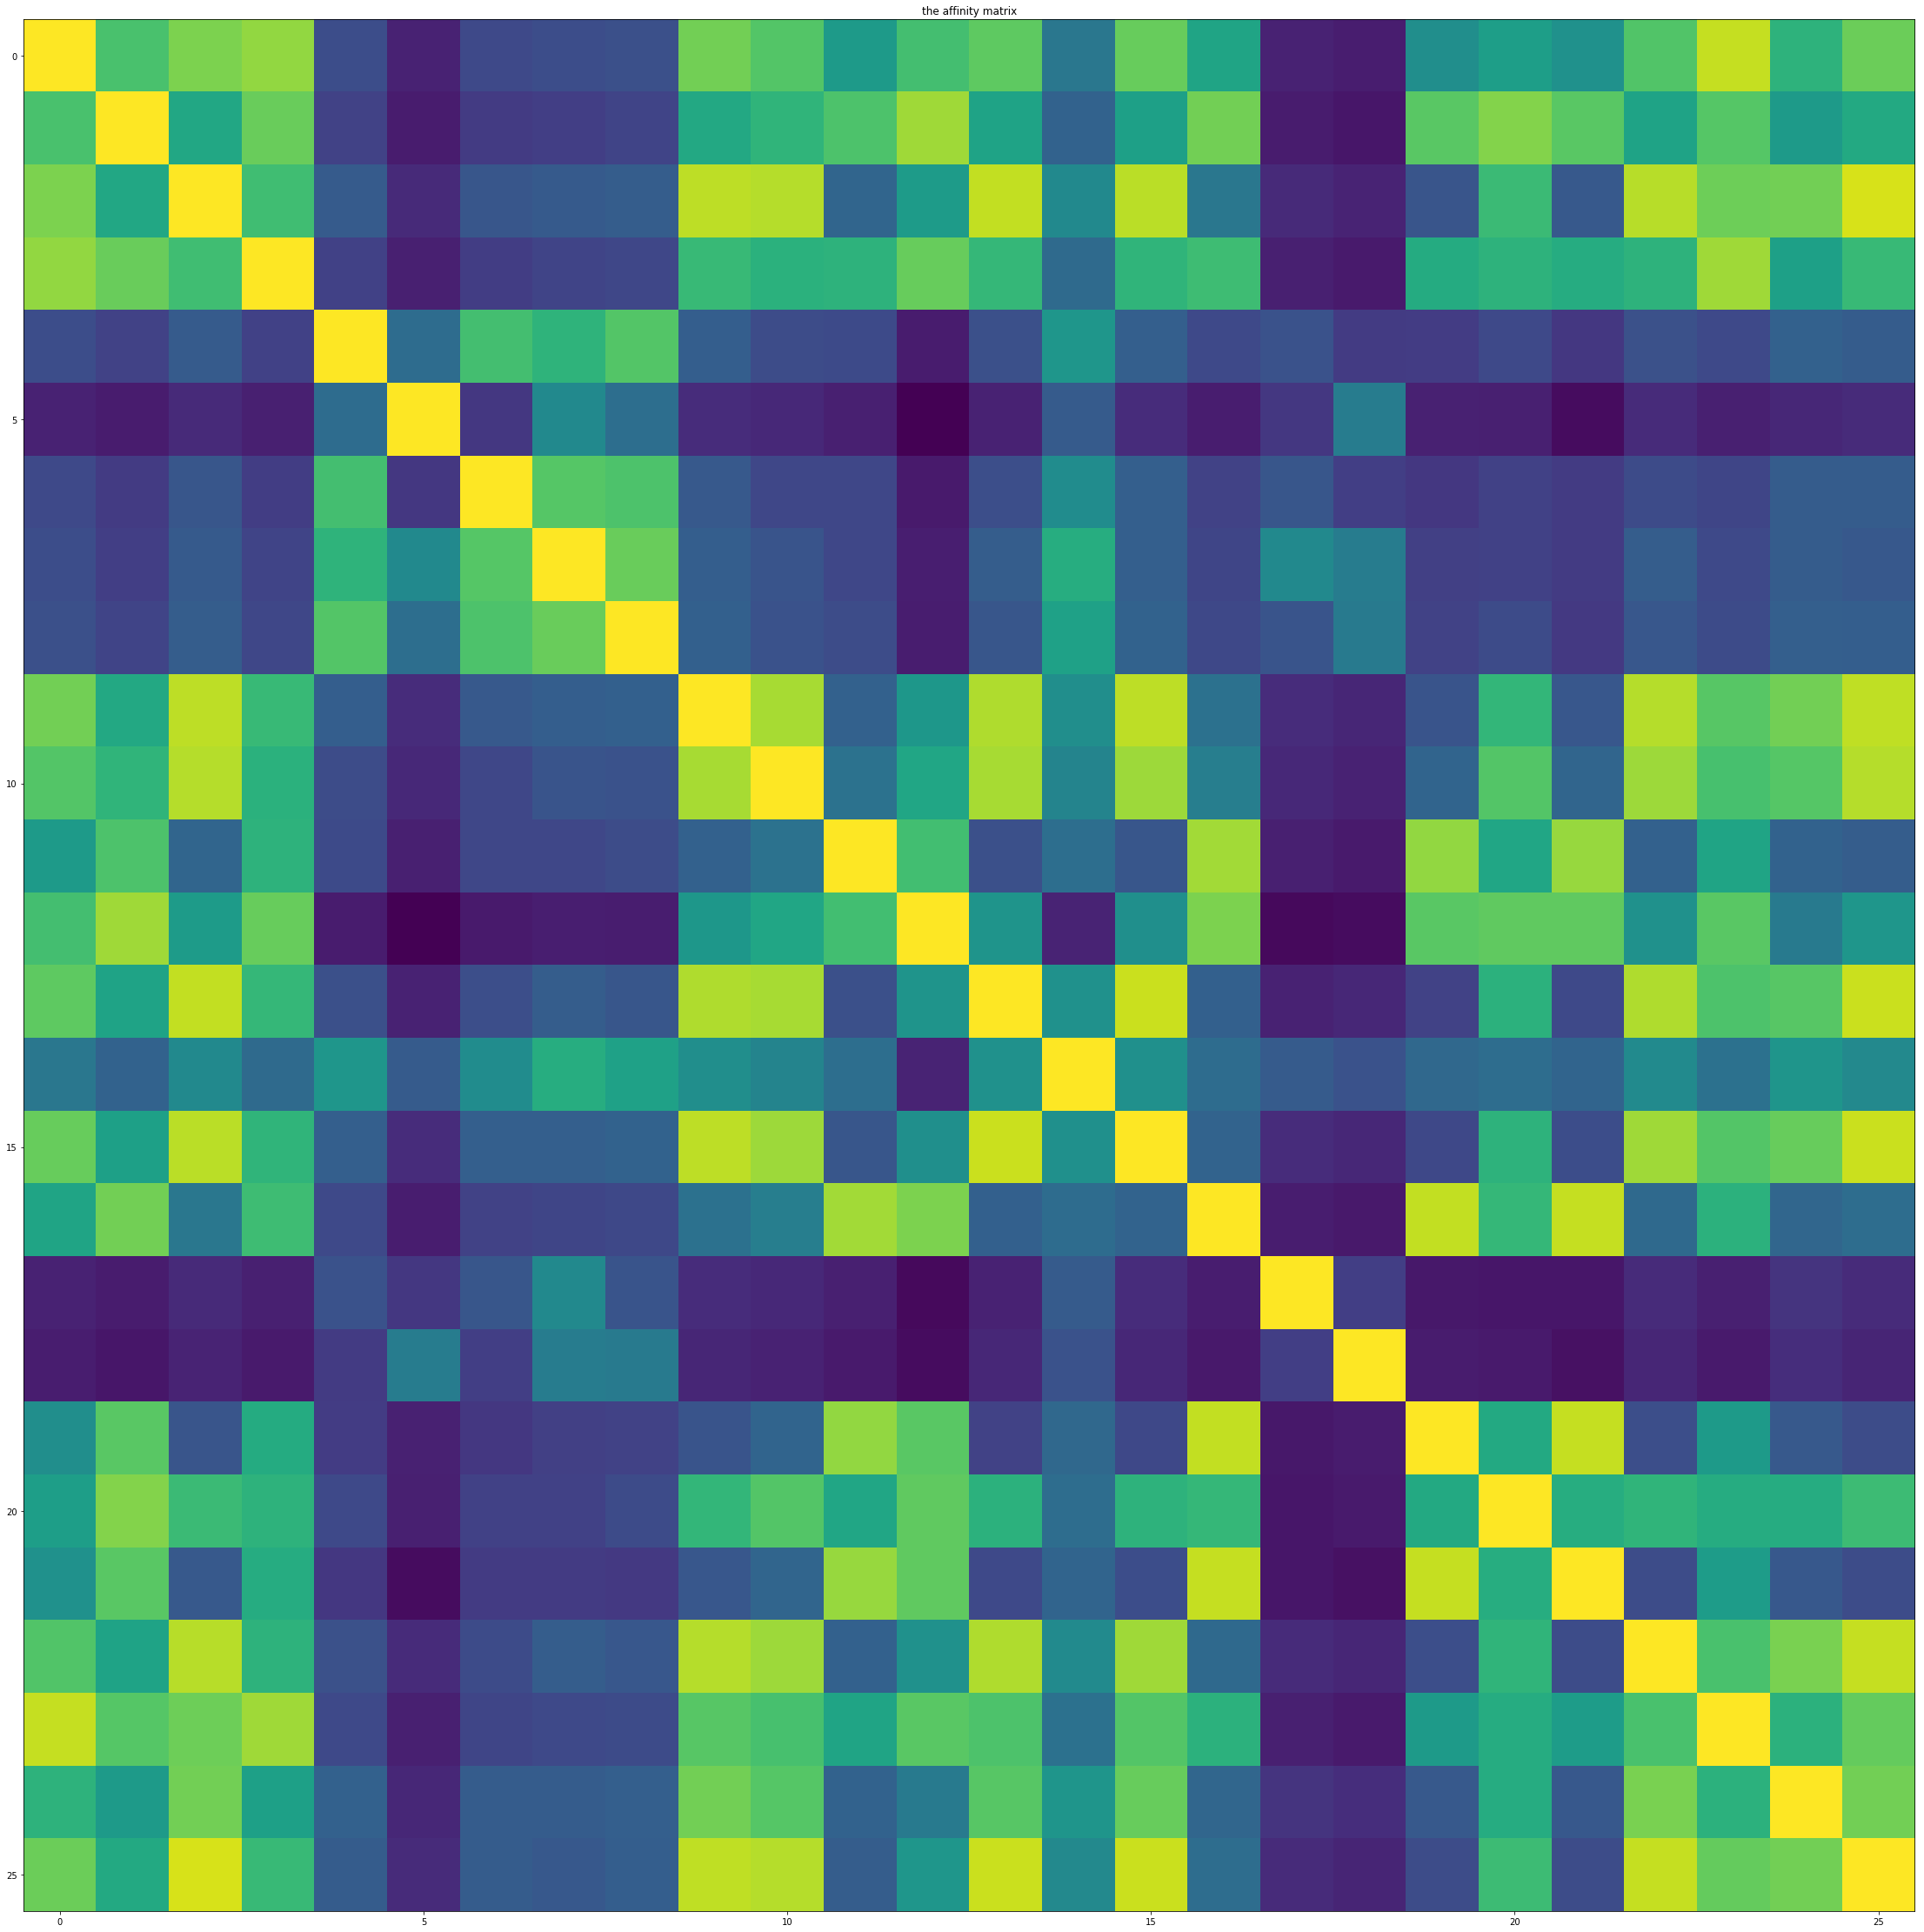

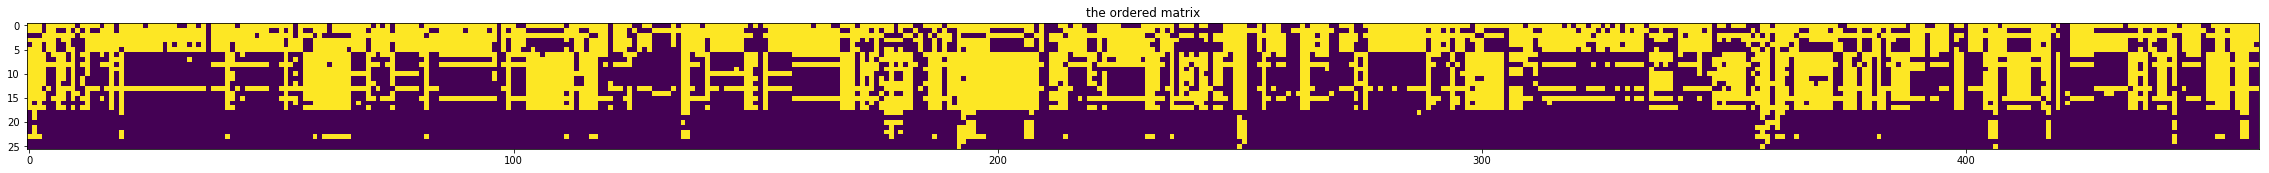

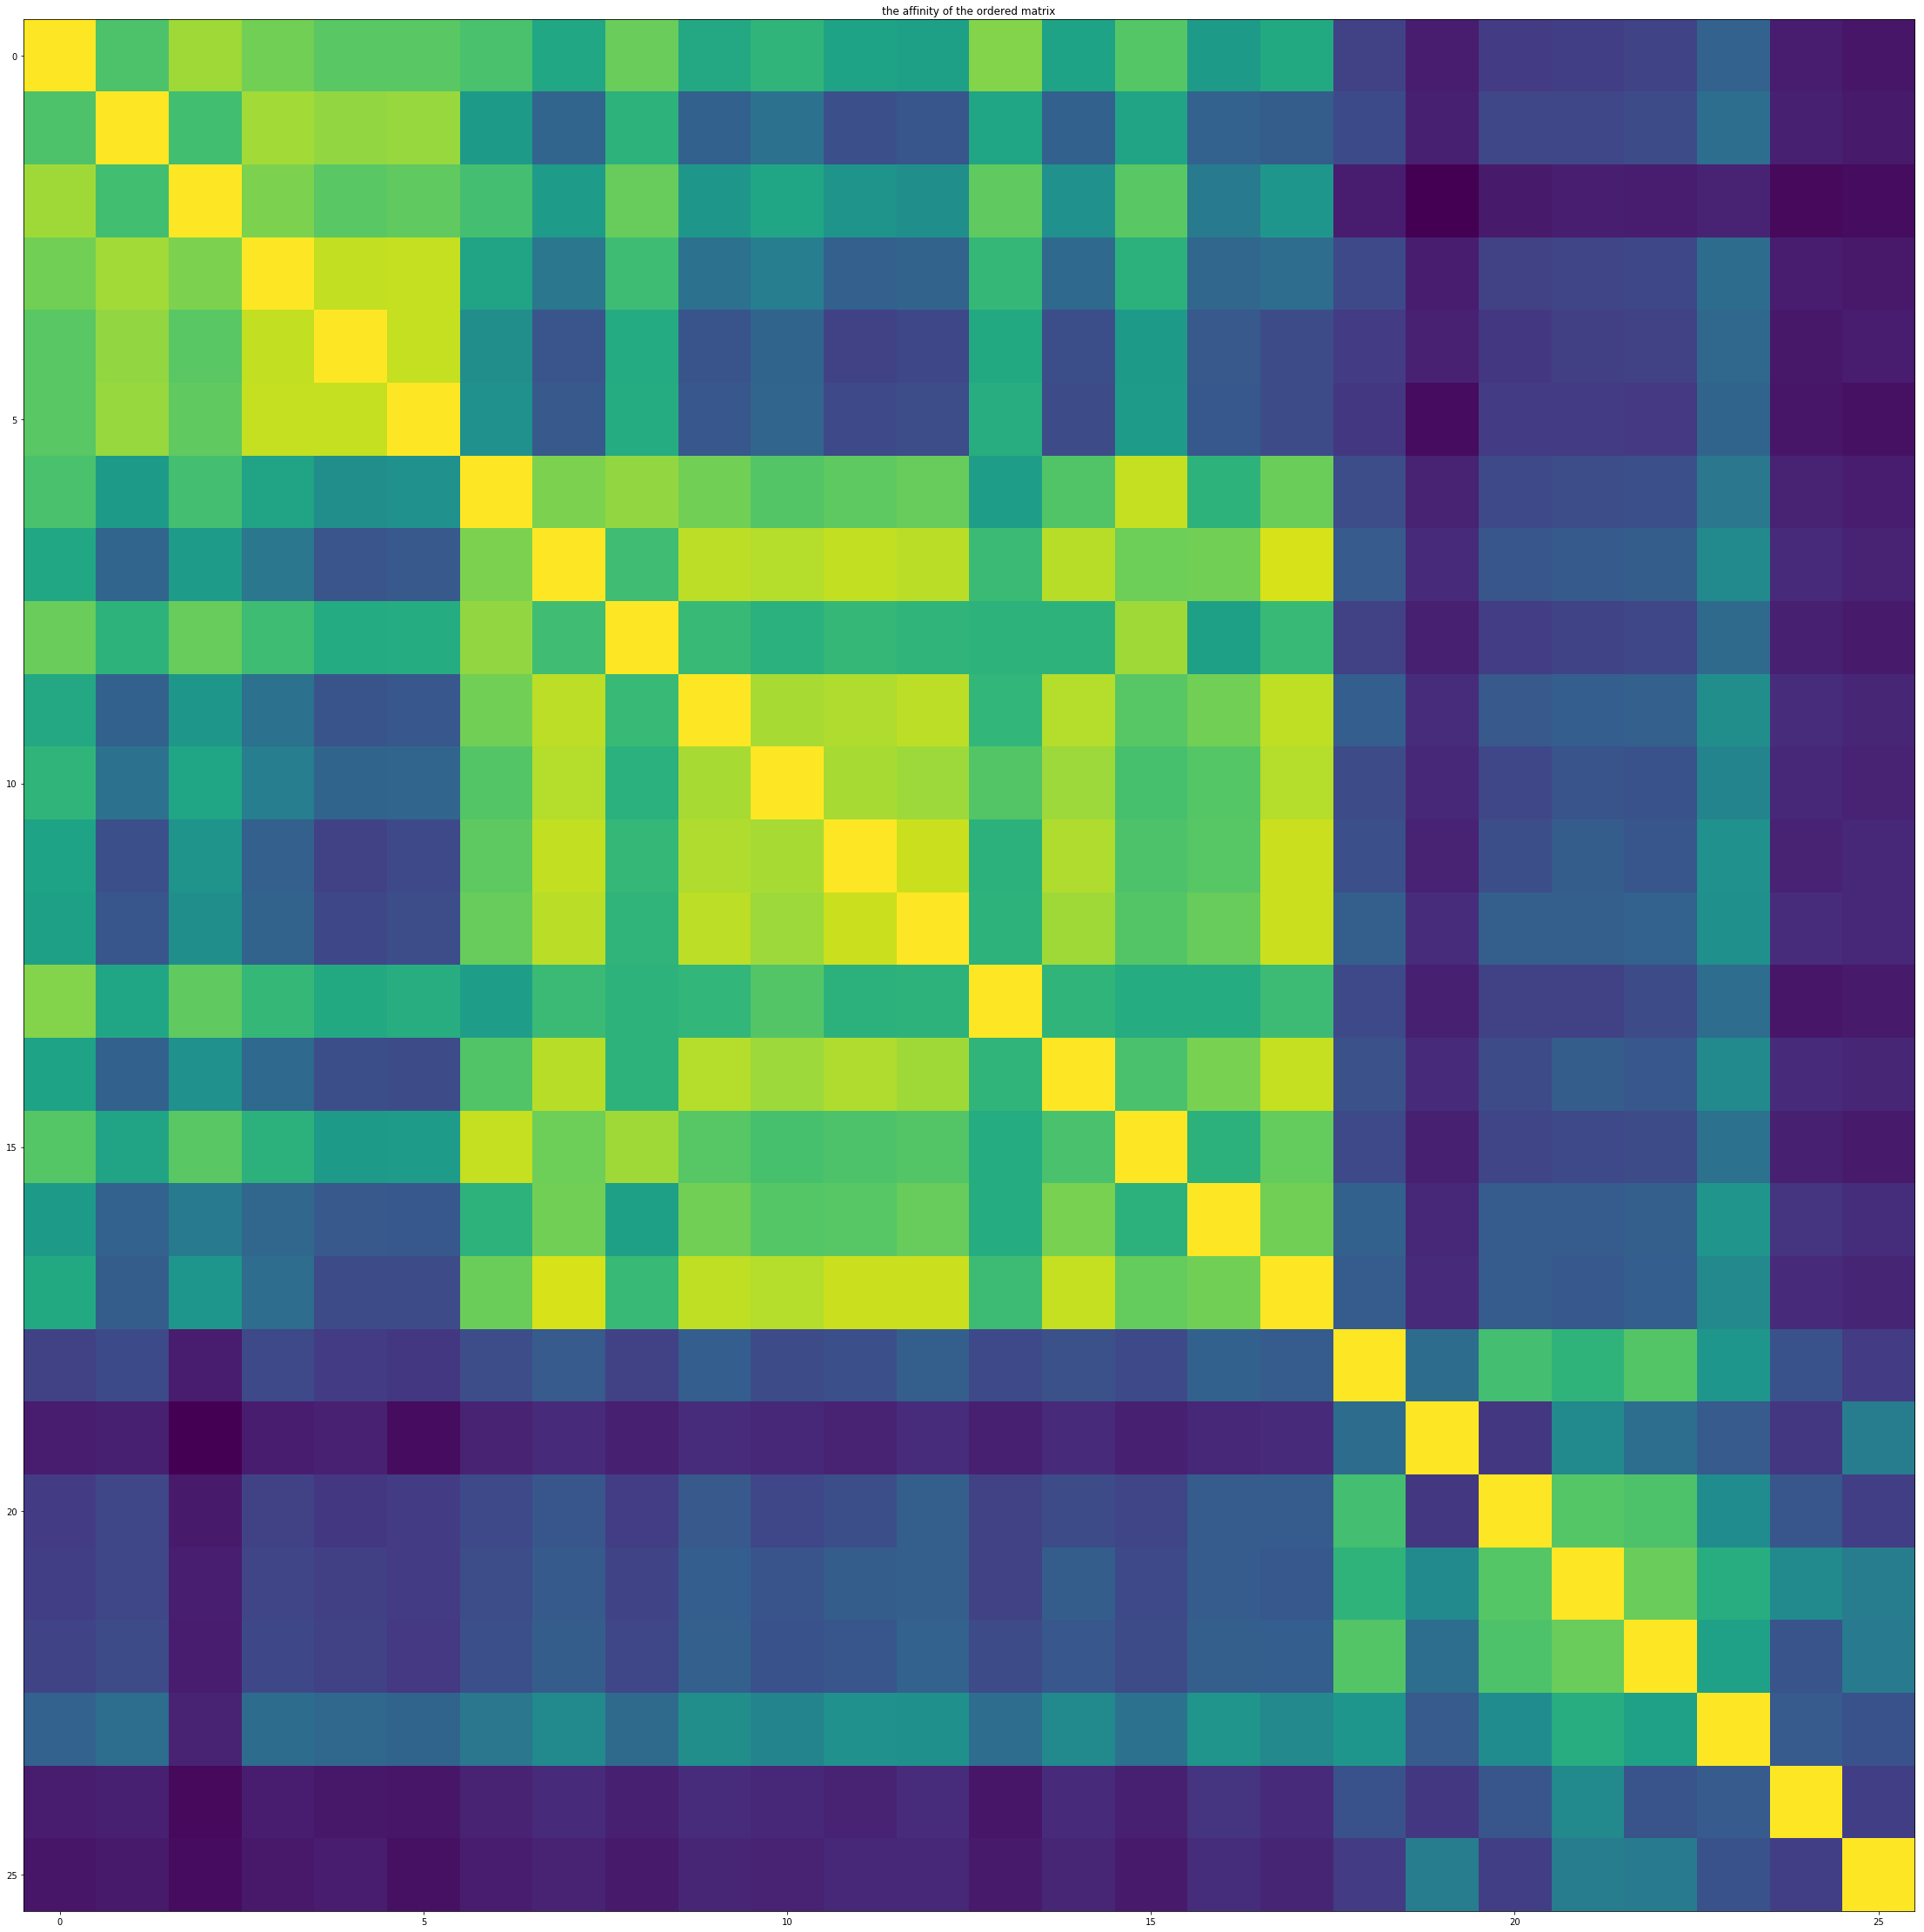

True

In [9]:
cub.all_homoset.order_from_matrix(clustering = 'kmodes', homogroupnb=3)

In [17]:
cub.all_homoset.clusters

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [12]:
cub.get_working_homoset(clusternb=1)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1938 samples in 0.003s...
[t-SNE] Computed neighbors for 1938 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1938
[t-SNE] Computed conditional probabilities for sample 1938 / 1938
[t-SNE] Mean sigma: 0.220391
[t-SNE] Computed conditional probabilities in 0.151s
[t-SNE] Iteration 50: error = 68.1373291, gradient norm = 0.0106859 (50 iterations in 5.740s)
[t-SNE] Iteration 100: error = 68.1375580, gradient norm = 0.0121794 (50 iterations in 7.130s)
[t-SNE] Iteration 150: error = 68.1372604, gradient norm = 0.0098372 (50 iterations in 8.934s)
[t-SNE] Iteration 200: error = 68.1377258, gradient norm = 0.0142939 (50 iterations in 6.324s)
[t-SNE] Iteration 250: error = 68.1377335, gradient norm = 0.0143823 (50 iterations in 6.421s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.137733
[t-SNE] Iteration 300: error = 1.6756126, gradient norm = 0.0014357 (50 iterations in 4.376s

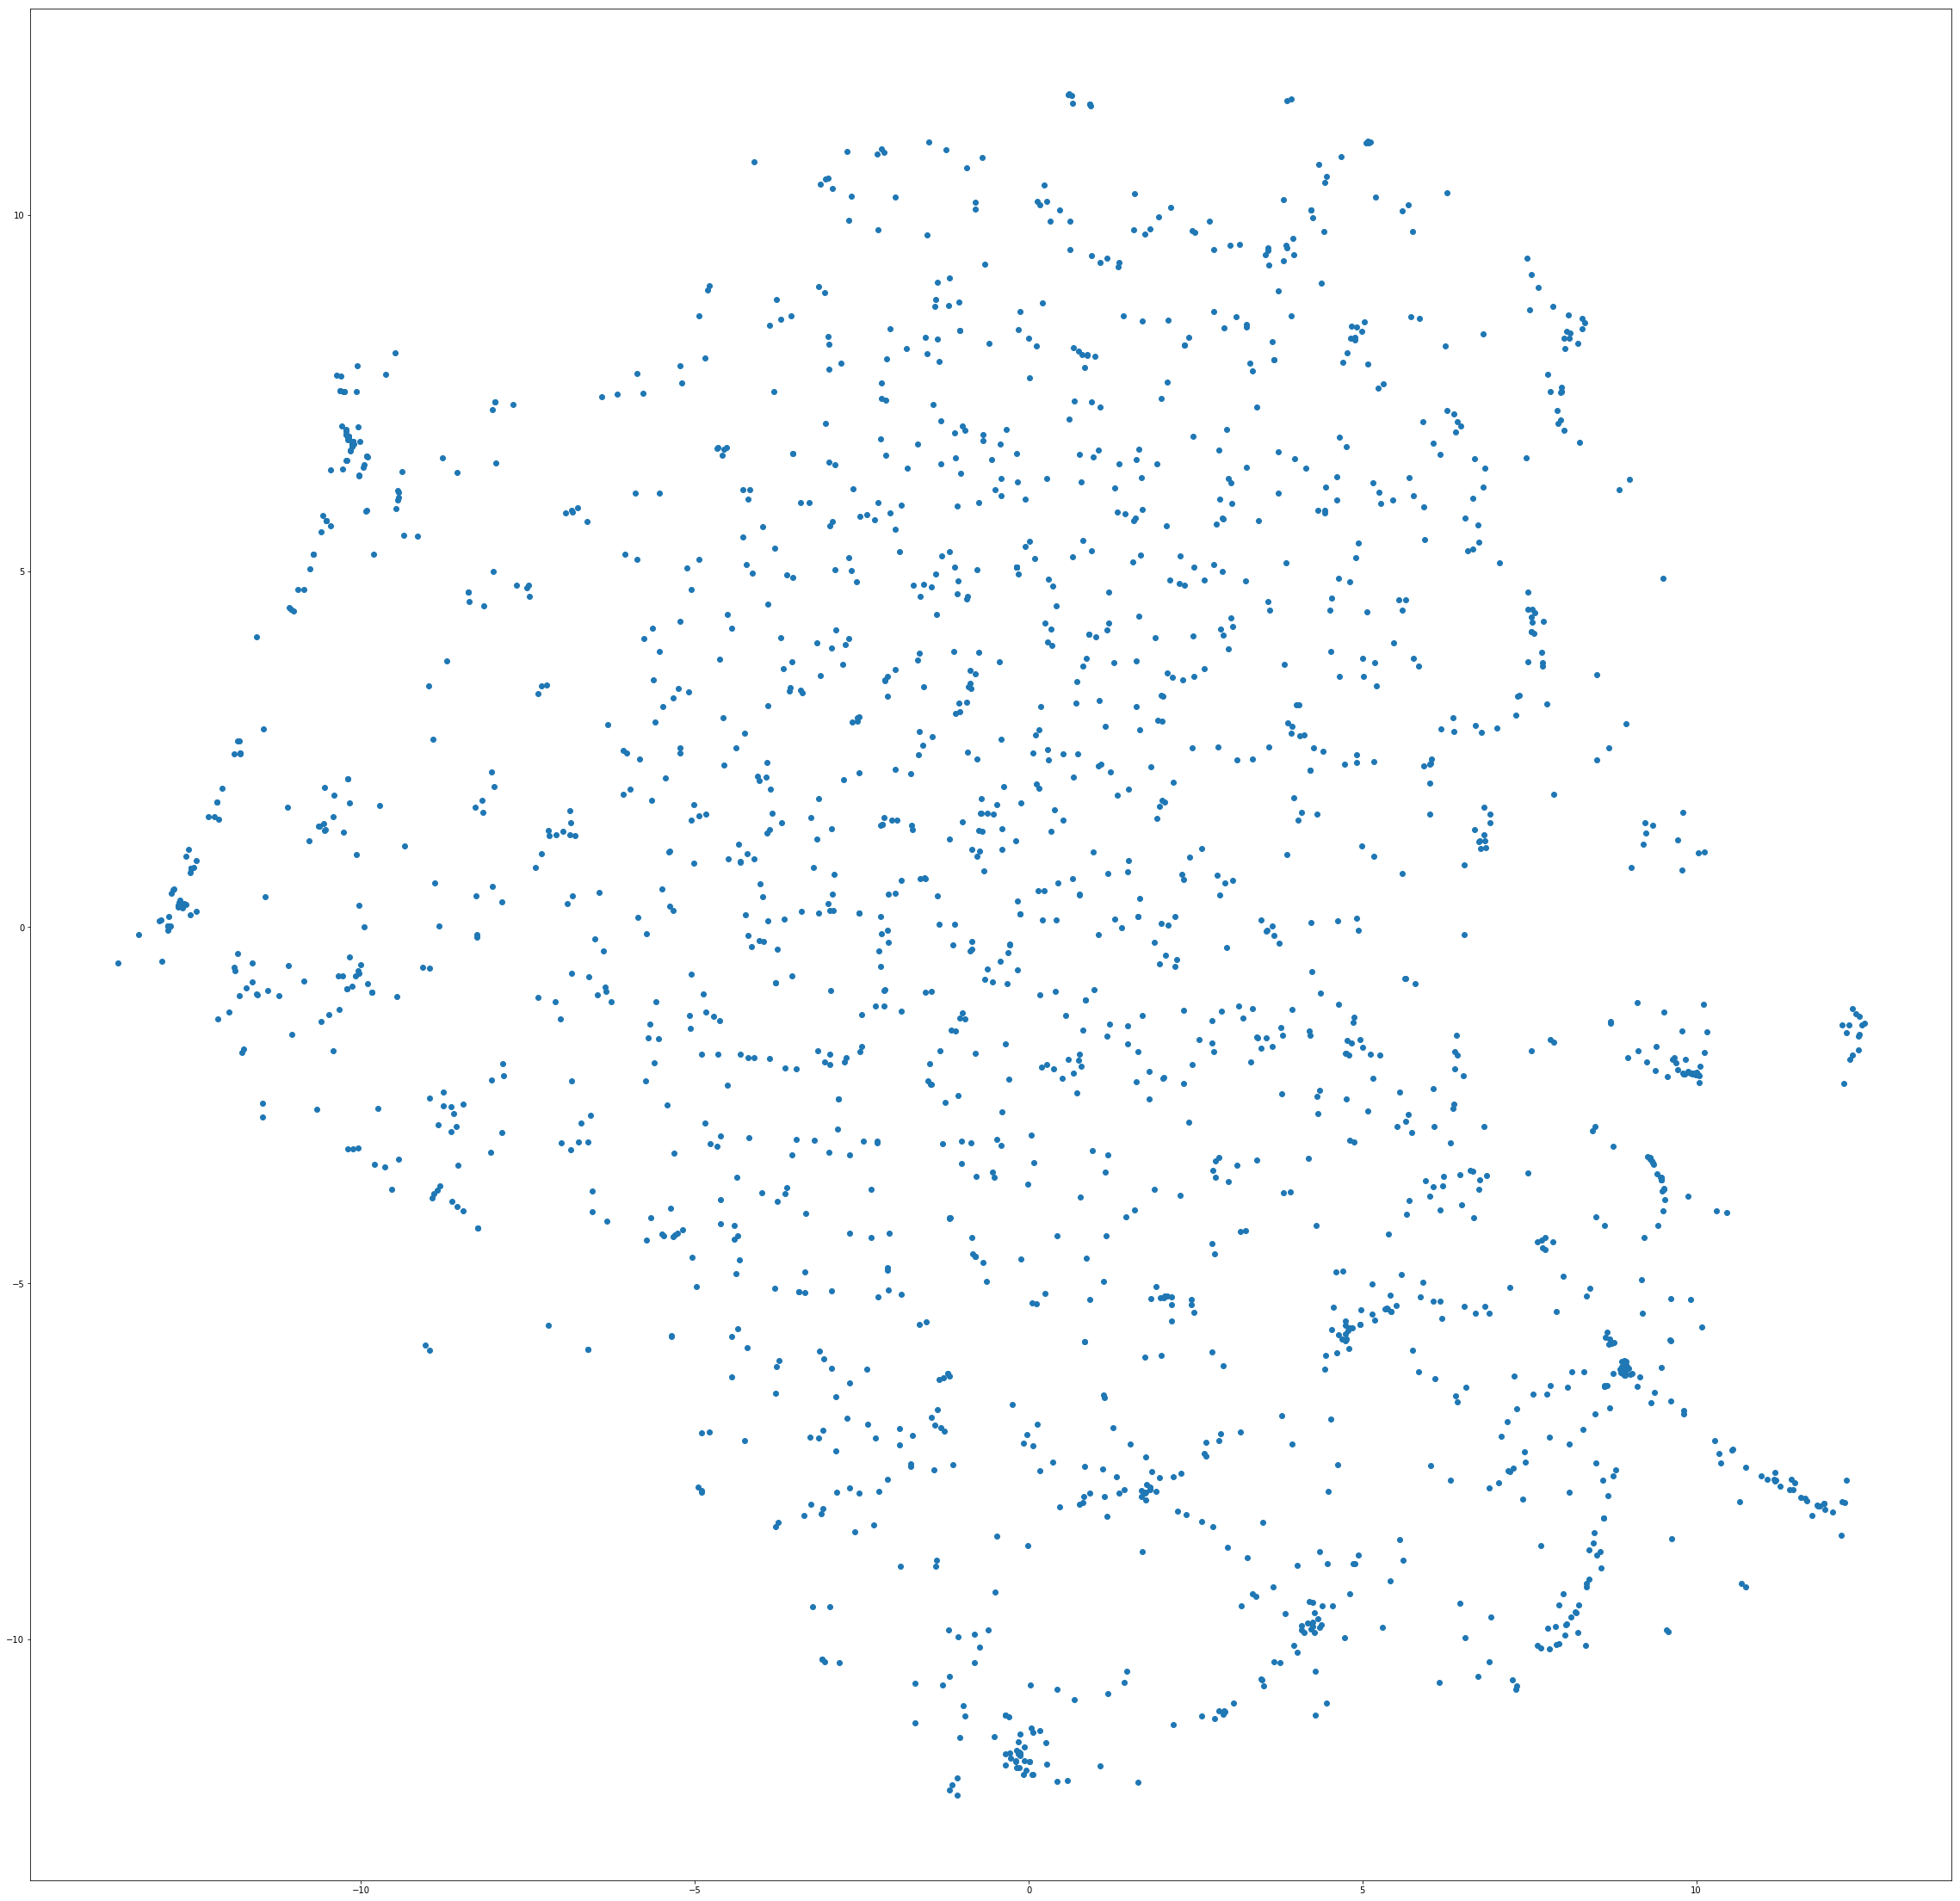

In [14]:
cub.working_homoset.plot_all()

## you can have a look at the data structure

In [52]:
cub.all_homoset.find_clusters(clustering='dbscan',homogroupnb=2)

TypeError: object of type 'NoneType' has no len()

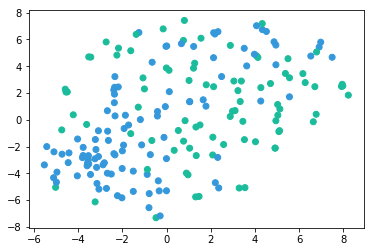

In [50]:
cub.all_homoset[cub.all_homoset.homo_namelist[12]].plot()

In [ ]:
len(cub.all_homoset.homodict)

## you can save and load your workspace

In [ ]:
cub.save("all")

In [ ]:
del cub

In [ ]:
cubA = pyCUB.PyCUB(session = 'jerem')
cubA.load(session = 'session1', filename = "all", fromYun=False)

In [ ]:
print len(cub.all_homoset.homo_namelist)

# test clusterings homo matrix

In [ ]:
del cubB
del cubA
cubA = cub
cubB= cub

In [ ]:
cubA.all_homoset.order_from_matrix(clustering='kmodes', homogroupnb= 5)

In [ ]:
cubB.all_homoset.order_from_matrix('fast')

In [ ]:
cubA.all_homoset.order_from_matrix('spectral')

In [ ]:
cub.loadmore(filename='homology4501t5000')

In [ ]:
cub.all_homoset.speciestable
#[cub.all_homoset.speciestable[name] for name in cub.all_homoset.homodict['YAL033W'].names]

In [ ]:
from sklearn.cluster import SpectralClustering

spectb = SpectralClustering(n_clusters=4, n_jobs=-1)
spectb.fit(similarities)

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(spectb.affinity_matrix_)
plt.show()

In [ ]:
spectb.labels_

## Interactive plot :

In [ ]:
from bokeh.plotting import *
from bokeh.models import HoverTool
from bokeh.io import output_notebook
output_notebook()

In [ ]:
GA = pi.Genes()
GA.plot_gene(tsne,Genes.specieslist[0],centroids=centroids,labels=labels)

In [ ]:
import os
folder='first50'
folder = "data/" + folder
for f in os.listdir(folder):
    nameA = f.split('homology')[0]
nameA

In [ ]:
import pandas as pd
a = pd.DataFrame()

In [ ]:
a.append([5,4,3])

# continuing tests

In [ ]:
a = cub.all_homoset['YBR160W'].full

In [ ]:
a

In [ ]:
import numpy as np

In [ ]:
arr = np.zeros((500,100,10))

In [ ]:
arr[:,:,5:]=1

In [ ]:
arr.reshape(50000,10)

In [9]:
x = [1, 2, 3]
y = [4, 5, 6]
x[1:]

[2, 3]

In [ ]:
zip(zipped)

In [ ]:
a

In [15]:
a = ['A','B','C']

In [20]:
a[1]

'B'